In [2]:
import numpy as np 
import pandas as pd 
import os 

In [3]:
folders = []
for folder in os.walk('../Data/3class_classification/'):
    path = folder[0] + '\\'
    for file in folder[-1]:
        if 'trial' in file:
            folders.append(path + file)
        else:
            os.remove(path + file)

In [4]:
Models = []
scores = []
for folder in folders:
    Models.append(pd.read_json(folder).iloc[1][1])
    scores.append(pd.read_json(folder).iloc[2][3])

In [5]:
Models = np.array(Models)
scores = np.array(scores)

In [6]:
threshold = 0.70

df = pd.DataFrame.from_dict(model for model in Models[scores>threshold])
df['score'] = scores[scores>threshold]
df.drop(columns='tuner/trial_id', inplace=True)

In [7]:
df.describe().loc[['min', 'max'], :].T

,min,max
num_layers,3.000000,6.000000
units_0,128.000000,640.000000
reg_0,0.000062,0.000108
dropout_0,0.000000,0.300000
units_1,128.000000,640.000000
reg_1,0.000062,0.000107
dropout_1,0.000000,0.350000
units_2,128.000000,640.000000
reg_2,0.000067,0.000103
dropout_2,0.000000,0.350000


In [8]:
df[df['tuner/epochs'] == 20].describe().T[['min', 'max']]

,min,max
num_layers,3.000000,6.000000
units_0,128.000000,512.000000
reg_0,0.000062,0.000108
dropout_0,0.000000,0.300000
units_1,128.000000,512.000000
reg_1,0.000062,0.000105
dropout_1,0.000000,0.200000
units_2,128.000000,512.000000
reg_2,0.000068,0.000103
dropout_2,0.050000,0.350000


In [9]:
df[df['tuner/epochs'] == 20].sort_values(by='score').T

,20,10,19,22,21,17,18,9
num_layers,5.000000,6.000000,5.000000,5.000000,6.000000,3.000000,4.000000,3.000000
units_0,384.000000,128.000000,128.000000,384.000000,128.000000,256.000000,512.000000,128.000000
reg_0,0.000065,0.000072,0.000068,0.000108,0.000073,0.000062,0.000085,0.000083
dropout_0,0.300000,0.050000,0.250000,0.100000,0.100000,0.000000,0.000000,0.050000
units_1,384.000000,512.000000,512.000000,256.000000,512.000000,128.000000,384.000000,256.000000
reg_1,0.000062,0.000105,0.000087,0.000101,0.000066,0.000090,0.000098,0.000086
dropout_1,0.150000,0.200000,0.150000,0.000000,0.000000,0.100000,0.000000,0.100000
units_2,128.000000,128.000000,384.000000,256.000000,512.000000,128.000000,256.000000,384.000000
reg_2,0.000099,0.000072,0.000071,0.000078,0.000103,0.000068,0.000071,0.000077
dropout_2,0.200000,0.050000,0.250000,0.150000,0.350000,0.050000,0.200000,0.200000


In [10]:
df[df['tuner/epochs'] == 20].sort_values(by='score')[-3:].agg(['mean', 'std']).T

,mean,std
num_layers,3.333333,0.577350
units_0,298.666667,195.523230
reg_0,0.000077,0.000013
dropout_0,0.016667,0.028868
units_1,256.000000,128.000000
reg_1,0.000091,0.000006
dropout_1,0.066667,0.057735
units_2,256.000000,128.000000
reg_2,0.000072,0.000005
dropout_2,0.150000,0.086603


In [15]:
df1 = pd.read_csv("../Data/hyperparameters.csv")
#df1 = pd.concat([df1, df], ignore_index=True, sort=True).reset_index(drop=True)

In [16]:
tmp = df1.sort_values(by='score', ascending=False)

<AxesSubplot:>

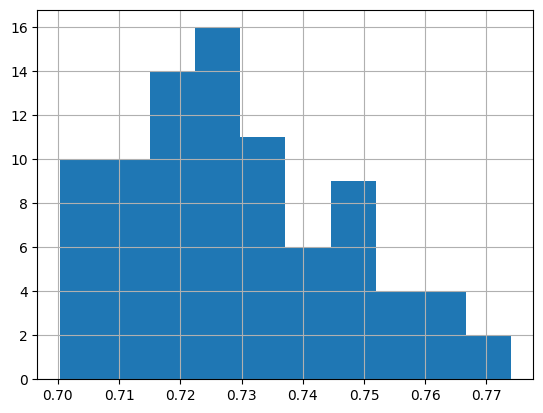

In [12]:
tmp['score'].hist()

In [28]:
tmp[tmp.score > 0.75].agg(['mean', 'std'])

,dropout_0,dropout_1,dropout_2,dropout_3,dropout_4,dropout_5,lrate,num_layers,reg_0,reg_1,...,tuner/bracket,tuner/epochs,tuner/initial_epoch,tuner/round,units_0,units_1,units_2,units_3,units_4,units_5
mean,0.110000,0.200000,0.150000,0.220000,0.112500,0.112500,0.001800,3.100000,0.000081,0.000098,...,1.100000,17.400000,4.500000,0.900000,320.000000,307.200000,268.800000,384.000000,512.0,352.00000
std,0.132916,0.161589,0.124722,0.115109,0.062915,0.062915,0.000632,0.567646,0.000016,0.000022,...,0.737865,5.481281,3.341656,0.737865,150.849447,123.659748,140.864632,156.767344,0.0,122.55067


In [14]:
tmp

,dropout_0,dropout_1,dropout_2,dropout_3,dropout_4,dropout_5,lrate,num_layers,reg_0,reg_1,...,tuner/bracket,tuner/epochs,tuner/initial_epoch,tuner/round,units_0,units_1,units_2,units_3,units_4,units_5
72,0.05,0.10,0.20,0.10,0.10,0.10,0.001,3,0.000083,0.000086,...,2,20,7,2,128,256,384.0,256.0,512.0,256.0
59,0.35,0.10,0.30,0.25,NaN,NaN,0.001,4,0.000099,0.000082,...,0,20,0,0,384,128,128.0,640.0,NaN,NaN
81,0.00,0.00,0.20,0.30,0.05,0.05,0.002,4,0.000085,0.000098,...,1,20,7,1,512,384,256.0,384.0,512.0,384.0
17,0.05,0.40,0.00,NaN,NaN,NaN,0.002,3,0.000068,0.000110,...,1,20,7,1,384,384,128.0,NaN,NaN,NaN
12,0.05,0.45,0.00,NaN,NaN,NaN,0.002,2,0.000106,0.000142,...,2,20,7,2,128,512,384.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,0.15,0.40,0.00,NaN,NaN,NaN,0.006,3,0.000084,0.000145,...,2,3,0,0,300,400,300.0,NaN,NaN,NaN
2,0.05,0.05,NaN,NaN,NaN,NaN,0.008,2,0.000120,0.000073,...,2,3,0,0,384,256,NaN,NaN,NaN,NaN
16,0.50,0.35,0.15,NaN,NaN,NaN,0.004,3,0.000143,0.000111,...,1,7,0,0,128,512,256.0,NaN,NaN,NaN
30,0.15,0.25,0.35,NaN,NaN,NaN,0.005,2,0.000105,0.000091,...,2,7,3,1,400,300,200.0,NaN,NaN,NaN


In [15]:
tmp.mean().T

dropout_0                0.135465
dropout_1                0.213372
dropout_2                0.207792
dropout_3                0.230303
dropout_4                0.139130
dropout_5                0.206522
lrate                    0.004221
num_layers               3.000000
reg_0                    0.000098
reg_1                    0.000097
reg_2                    0.000100
reg_3                    0.000091
reg_4                    0.000090
reg_5                    0.000084
score                    0.728858
tuner/bracket            1.360465
tuner/epochs            10.616279
tuner/initial_epoch      1.825581
tuner/round              0.453488
units_0                308.465116
units_1                363.255814
units_2                329.090909
units_3                376.242424
units_4                450.782609
units_5                345.043478
dtype: float64

In [16]:
df1.to_csv('../Data/hyperparameters.csv', index=False)